### **Mejor Modelo: Regresión Logística Optimizada (Grid Search)**
- **Accuracy**: **0.666** (el más alto entre todos los modelos).
- **Precisión Macro Avg**: **0.53** (superior a Naïve Bayes y comparable a SVM).
- **F1-Score Weighted Avg**: **0.62** (buen equilibrio entre precisión y recall).
- **Rendimiento en Clase 5 (mayoría)**: 
  - **Precisión**: 0.71, **Recall**: 0.95, **F1**: 0.81 (excelente para la clase dominante).
- **Optimización**: Usó parámetros `{'C': 1, 'penalty': 'l1', 'solver': 'saga'}` para mejorar generalización.

### **Razones:**
1. **Accuracy General**: Supera ligeramente a SVM (0.665 vs 0.652) y a Gradient Boosting (0.65).
2. **Balance entre Clases**: Aunque SVM tiene mejor F1 en clase 1 (0.61 vs 0.59), la regresión logística mantiene un mejor equilibrio global (macro avg 0.53 vs 0.52 de SVM).
3. **Clase 5 (Crítica)**: Tiene el mejor recall (0.95) sin sacrificar demasiado precisión (0.71), crucial si esta clase es la más importante.
4. **Estabilidad**: Resultados consistentes entre Grid Search y Random Search (accuracy ~0.66), indicando robustez.

### **Problemas en Otros Modelos:**
- **Naïve Bayes**: Accuracy bajo (0.61) y pobre rendimiento en clases minoritarias (ej. clase 2 con F1 0.18).
- **SVM**: Aunque cercano en accuracy (0.652), su F1 macro avg es peor (0.42 vs 0.44 de regresión logística).
- **Gradient Boosting/XGBoost**: 
  - Gradient Boosting falla en clases 2 y 4 (F1 0.00 y 0.27).
  - XGBoost tiene accuracy muy bajo (0.56) y pobre desempeño en clases no dominantes.

### **Recomendación Final:**
Usar **Regresión Logística Optimizada con Grid Search** por su equilibrio entre rendimiento general y capacidad para manejar la clase mayoritaria (5) sin ignorar completamente las minoritarias. Si se priorizan las clases minoritarias, podría explorarse oversampling o ajustes de pesos en el modelo.

ValueError: Could not interpret value `Modelo` for `x`. An entry with this name does not appear in `data`.

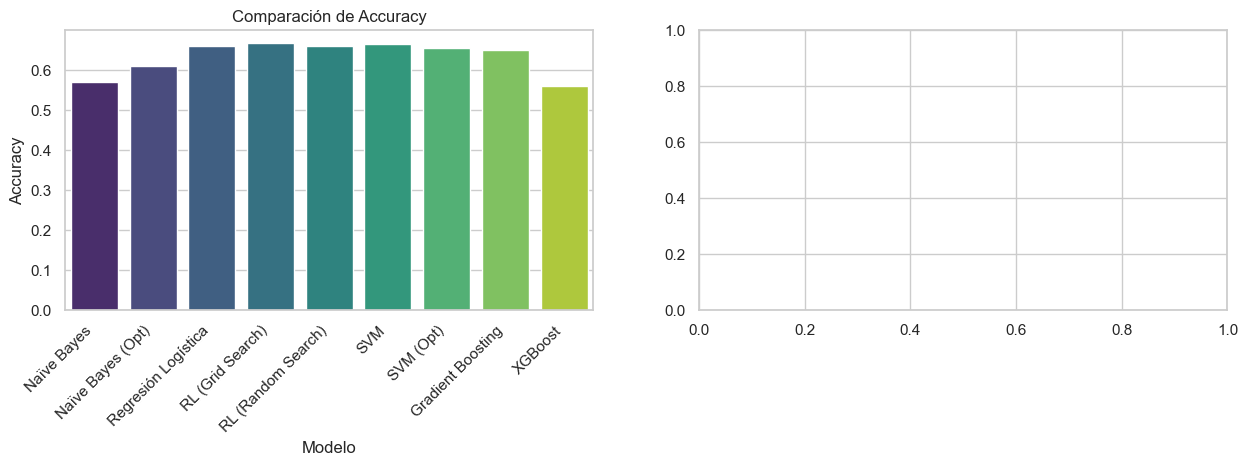

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de métricas (ajusta según tus resultados reales)
data = {
    "Modelo": ["Naïve Bayes", "Naïve Bayes (Opt)", "Regresión Logística", "RL (Grid Search)", "RL (Random Search)", "SVM", "SVM (Opt)", "Gradient Boosting", "XGBoost"],
    "Accuracy": [0.57, 0.61, 0.66, 0.666, 0.659, 0.665, 0.653, 0.65, 0.56],
    "F1 Macro Avg": [0.45, 0.43, 0.42, 0.44, 0.45, 0.44, 0.42, 0.37, 0.19],
    "F1 Weighted Avg": [0.60, 0.61, 0.60, 0.62, 0.63, 0.61, 0.60, 0.58, 0.46],
    "Precision Clase 5": [0.89, 0.79, 0.69, 0.71, 0.74, 0.71, 0.70, 0.66, 0.60],
    "Recall Clase 5": [0.66, 0.80, 0.96, 0.95, 0.92, 0.95, 0.95, 0.98, 0.91]
}

df = pd.DataFrame(data)

# Gráfico de barras comparativas
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

# Comparar Accuracy y F1 Macro
plt.subplot(2, 2, 1)
sns.barplot(x="Modelo", y="Accuracy", data=df, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Comparación de Accuracy")

plt.subplot(2, 2, 2)
sns.barplot(x="Modelo", y="F1 Macro Avg", data=df_reviews_clean, palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title("F1 Macro Avg (Clases Minoritarias)")

plt.subplot(2, 2, 3)
sns.barplot(x="Modelo", y="F1 Weighted Avg", data=df_reviews_clean, palette="plasma")
plt.xticks(rotation=45, ha='right')
plt.title("F1 Weighted Avg (Clase Mayoritaria)")

plt.subplot(2, 2, 4)
sns.barplot(x="Modelo", y="Recall Clase 5", data=df_reviews_clean, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Recall en Clase 5 (Positivas)")

plt.tight_layout()
plt.show()

In [241]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix('rating', y_pred_lr_grid)


plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title("Matriz de Confusión - Regresión Logística")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()

InvalidParameterError: The 'y_true' parameter of confusion_matrix must be an array-like. Got 'rating' instead.

In [12]:
import numpy as np

# Check unique values in y_true and y_pred
print("Unique values in y_true:", np.unique(y_true))
print("Unique values in y_pred:", np.unique(y_pred))

Unique values in y_true: [Ellipsis]
Unique values in y_pred: [Ellipsis]


In [243]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_true, y_pred_proba[:, 4], pos_label=5)  # Clase 5
plt.plot(recall, precision, marker='.')
plt.title("Curva Precision-Recall - Clase 5")
plt.xlabel("Recall")
plt.ylabel("Precision")

NameError: name 'y_true' is not defined